In [2]:
import numpy as np
import deepxde as dde
from deepxde.backend import tf


In [3]:
def pde(x, u):
    du_x = tf.gradients(u, x)[0]
    du_xx = tf.gradients(du_x, x)[0]
    return du_xx + 6*x



In [4]:
geom = dde.geometry.Interval(0, 1)
bc = dde.DirichletBC(geom, lambda x: 0, lambda _, on_boundary: on_boundary)


In [5]:
data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=20, train_distribution='pseudo')
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)


In [6]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(epochs=10000)


Compiling model...
Building feed-forward neural network...
'build' took 0.026342 s


/home/vasco/dev/Python-Projects/HackSciML-g19/venv/lib/python3.10/site-packages/deepxde/maps/fnn.py:105: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
2023-10-02 20:27:39.818061: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-02 20:27:39.831521: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-02 20:27:39.831619: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_e

'compile' took 0.453482 s


2023-10-02 20:27:40.122732: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-02 20:27:40.122808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-02 20:27:40.122858: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric
0         [1.19e+01, 2.73e-03]    [1.19e+01, 0.00e+00]    []  


2023-10-02 20:27:40.723919: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1000      [1.07e-04, 1.60e-08]    [1.07e-04, 0.00e+00]    []  
2000      [9.74e-06, 1.97e-08]    [9.74e-06, 0.00e+00]    []  
3000      [7.47e-06, 1.24e-04]    [7.47e-06, 0.00e+00]    []  
4000      [5.45e-06, 1.12e-05]    [5.45e-06, 0.00e+00]    []  
5000      [4.94e-06, 1.46e-05]    [4.94e-06, 0.00e+00]    []  
6000      [2.90e-05, 1.96e-06]    [2.90e-05, 0.00e+00]    []  
7000      [4.27e-06, 9.37e-06]    [4.27e-06, 0.00e+00]    []  
8000      [3.44e-06, 1.83e-11]    [3.44e-06, 0.00e+00]    []  
9000      [8.00e-06, 5.44e-06]    [8.00e-06, 0.00e+00]    []  
10000     [3.88e-06, 2.29e-06]    [3.88e-06, 0.00e+00]    []  

Best model at step 8000:
  train loss: 3.44e-06
  test loss: 3.44e-06
  test metric: []

'train' took 16.599708 s


In [9]:
# DeepXDE prediction
x = np.linspace(0, 1, 100)[:, None]
y_pred = model.predict(x)

# Analytical solution
y_true = -x**3 + x**2



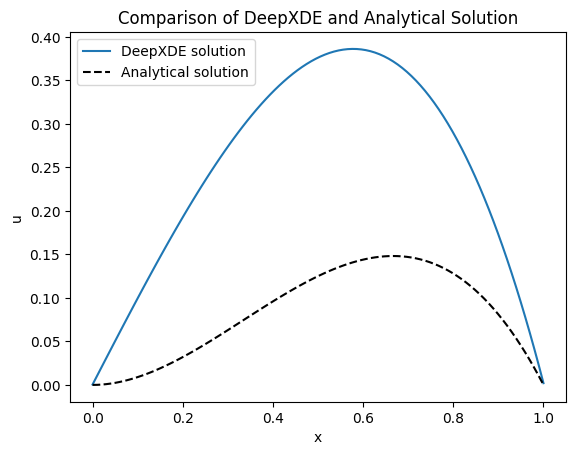

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, y_pred, label="DeepXDE solution")
plt.plot(x, y_true, 'k--', label="Analytical solution")
plt.xlabel("x")
plt.ylabel("u")
plt.title("Comparison of DeepXDE and Analytical Solution")
plt.legend()
plt.show()
